Article: TBA\
Code: Red and White Wine binary classification using Support Vector Machines, Random Forest, Gradient Boost, and Logistic Regression\
Dataset Link: https://archive.ics.uci.edu/ml/datasets/wine+quality\
Prepared By: Awais Naeem (awais.naeem@embedded-robotics.com)\
Copyrights: www.embedded-robotics.com\
Disclaimer: This code can be distributed with the proper mention of the owner copyrights

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
%matplotlib inline

#### Part 1: Data Reading, Preprocessing, and Exploratory Analysis

In [61]:
red_wine_data = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv('winequality-white.csv', delimiter=';')

In [62]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [63]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [64]:
red_wine_data['class'] = 'red'
white_wine_data['class'] = 'white'

In [65]:
wine_data = pd.concat([red_wine_data, white_wine_data], axis=0, ignore_index=True)

In [66]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

In [67]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
class                    object
dtype: object

In [68]:
wine_data['target'] = np.where(wine_data['class']=='white', 1, 0)

In [69]:
wine_data.corr()['target'].sort_values(ascending=True)

volatile acidity       -0.653036
chlorides              -0.512678
sulphates              -0.487218
fixed acidity          -0.486740
density                -0.390645
pH                     -0.329129
alcohol                 0.032970
quality                 0.119323
citric acid             0.187397
residual sugar          0.348821
free sulfur dioxide     0.471644
total sulfur dioxide    0.700357
target                  1.000000
Name: target, dtype: float64

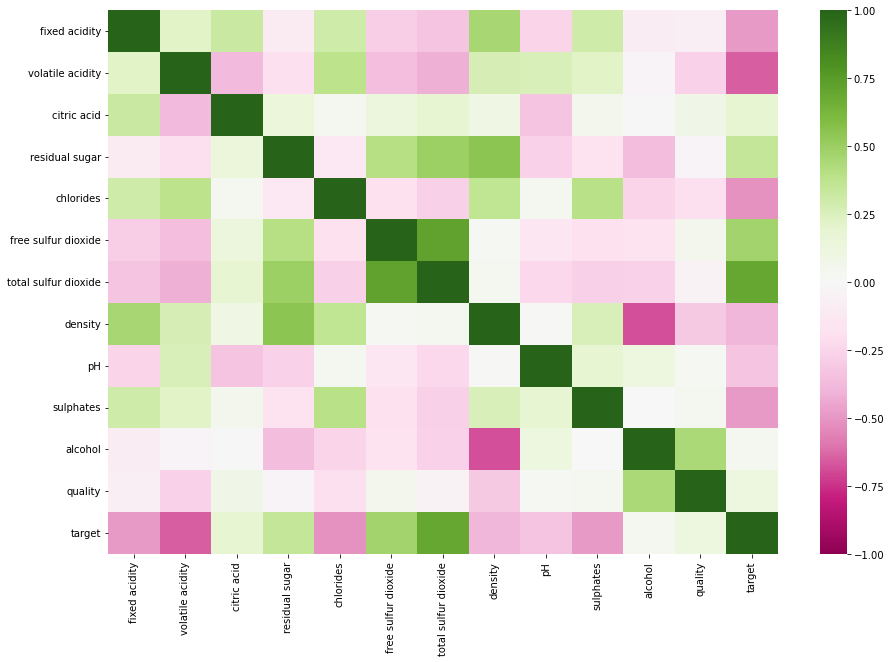

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(wine_data.corr(), vmin=-1, vmax=1, cmap='PiYG')
plt.show()

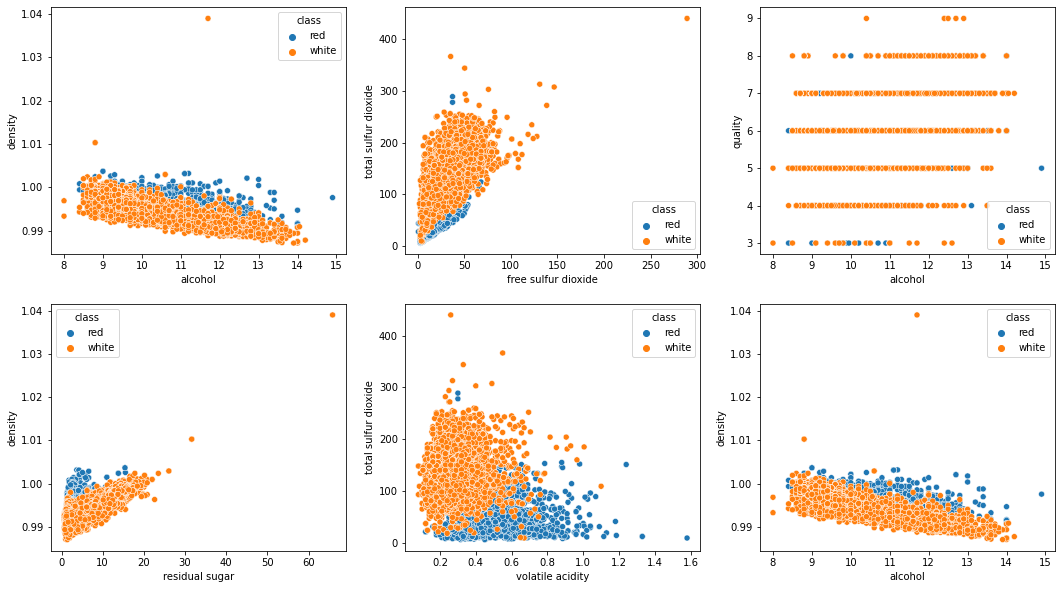

In [91]:
fig, axes = plt.subplots(2,3, figsize=(18,10))
sns.scatterplot(data=wine_data, x='alcohol', y='density', hue='class', ax=axes[0, 0])
sns.scatterplot(data=wine_data, x='free sulfur dioxide', y='total sulfur dioxide', hue='class', ax=axes[0, 1])
sns.scatterplot(data=wine_data, x='alcohol', y='quality', hue='class', ax=axes[0, 2])
sns.scatterplot(data=wine_data, x='residual sugar', y='density', hue='class', ax=axes[1, 0])
sns.scatterplot(data=wine_data, x='volatile acidity', y='total sulfur dioxide', hue='class', ax=axes[1, 1])
sns.scatterplot(data=wine_data, x='alcohol', y='density', hue='class', ax=axes[1, 2])
plt.show()

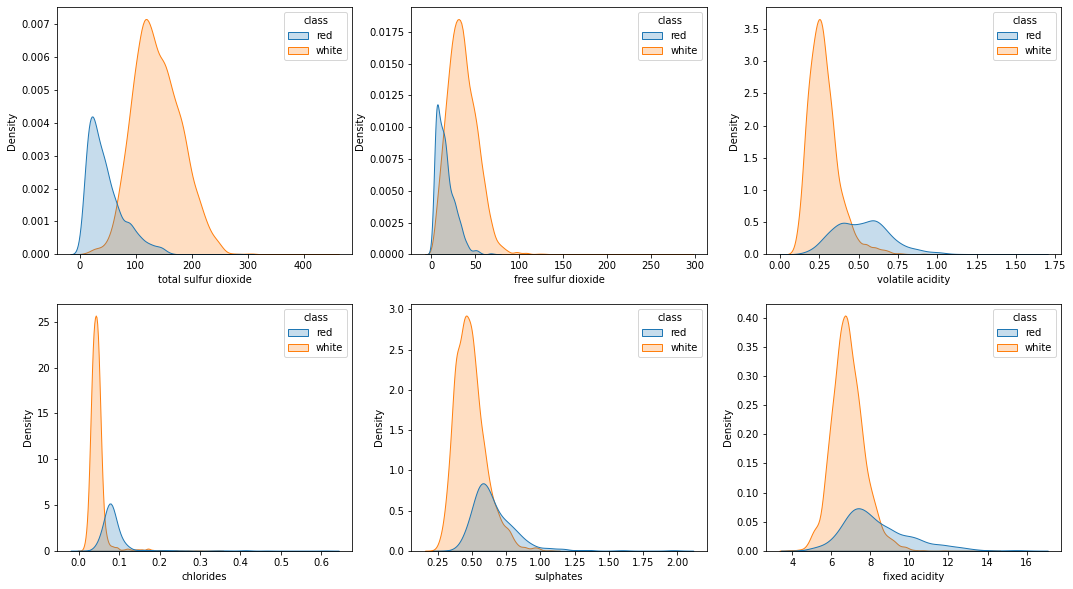

In [77]:
fig, axes = plt.subplots(2,3, figsize=(18, 10))
sns.kdeplot(data=wine_data, x='total sulfur dioxide', hue='class', shade='class', ax=axes[0, 0])
sns.kdeplot(data=wine_data, x='free sulfur dioxide', hue='class', shade='class', ax=axes[0, 1])
sns.kdeplot(data=wine_data, x='volatile acidity', hue='class', shade='class', ax=axes[0, 2])
sns.kdeplot(data=wine_data, x='chlorides', hue='class', shade='class', ax=axes[1, 0])
sns.kdeplot(data=wine_data, x='sulphates', hue='class', shade='class', ax=axes[1, 1])
sns.kdeplot(data=wine_data, x='fixed acidity', hue='class', shade='class', ax=axes[1, 2])
plt.show()

In [39]:
wine_data.drop('class', axis=1, inplace=True)

In [40]:
wine_data = wine_data.astype('float32')
data_X = wine_data.drop('target', axis=1)
data_y = wine_data['target']
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=1)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Part 2: White and Red Wine Classification using Support Vector Machines

In [16]:
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=1)

In [17]:
svm_y_pred = svm_model.predict(X_test)

In [18]:
print('Accuracy Score', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report\n', classification_report(y_test, svm_y_pred))

Accuracy Score 0.9944615384615385
Confusion Matrix
 [[ 376    6]
 [   3 1240]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       382
         1.0       1.00      1.00      1.00      1243

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [19]:
svm_param_grid = {'C':[0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf'],
                'gamma' :[0.001, 0.01, 0.1, 1, 10]}
svm_cv = StratifiedKFold(n_splits=5)
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=svm_cv, scoring='accuracy')
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [20]:
print('SVM best Params:', svm_grid.best_params_)
print('SVMbBest Score:', svm_grid.best_score_)

SVM best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVMbBest Score: 0.9969201284683831


In [21]:
svm_y_pred = svm_grid.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 0.9944615384615385
Confusion Matrix:
 [[ 376    6]
 [   3 1240]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       382
         1.0       1.00      1.00      1.00      1243

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



#### Part 3: Red and White wine data classification using Random Forest Classifier

In [22]:
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [23]:
rf_y_pred = rf_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuracy Score: 0.992
Confusion Matrix:
 [[ 372   10]
 [   3 1240]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       382
         1.0       0.99      1.00      0.99      1243

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [24]:
rf_param_grid = {'max_samples': [0.1, 0.2, 0.3, 0.4],
                'max_features': [5, 6, 7],
                'n_estimators' :[50, 100, 500, 1000],
                'max_depth': [10, 11, 12]
                }
rf_cv = StratifiedKFold(n_splits=5)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=rf_cv)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12], 'max_features': [5, 6, 7],
                         'max_samples': [0.1, 0.2, 0.3, 0.4],
                         'n_estimators': [50, 100, 500, 1000]})

In [25]:
print('RF best Parameters:', rf_grid.best_estimator_)
print('RF best Score:', rf_grid.best_score_)

RF best Parameters: RandomForestClassifier(max_depth=10, max_features=5, max_samples=0.4,
                       n_estimators=500)
RF best Score: 0.9940470699731481


In [26]:
rf_y_pred = rf_grid.predict(X_test)
print('Accuray:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuray: 0.9907692307692307
Confusion Matrix:
 [[ 373    9]
 [   6 1237]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       382
         1.0       0.99      1.00      0.99      1243

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



#### Part 4: Red and White wine data classification using Gradient Boosting Classifier

In [27]:
gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [28]:
gb_y_pred = gb_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuracy Score: 0.9926153846153846
Confusion Matrix:
 [[ 374    8]
 [   4 1239]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       382
         1.0       0.99      1.00      1.00      1243

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [29]:
gb_grid_param = {'learning_rate': [0.01, 0.05, 0.1],
                'n_estimators' : [10, 50, 100],
                'max_depth': [10, 11, 12],
                'max_features': [5, 6, 7]}
gb_cv = StratifiedKFold(n_splits=5)
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_grid_param, cv=gb_cv)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [10, 11, 12], 'max_features': [5, 6, 7],
                         'n_estimators': [10, 50, 100]})

In [30]:
print('GB best Parameters:', gb_grid.best_estimator_)
print('GB best Score:', gb_grid.best_score_)

GB best Parameters: GradientBoostingClassifier(max_depth=10, max_features=5, n_estimators=50)
GB best Score: 0.9963049544569053


In [31]:
gb_y_pred = gb_grid.predict(X_test)
print('Accuray:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuray: 0.9932307692307693
Confusion Matrix:
 [[ 373    9]
 [   2 1241]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       382
         1.0       0.99      1.00      1.00      1243

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



#### Part 5: Selecting the Important Features in the Dataset

In [32]:
features = ["total sulfur dioxide", "volatile acidity", "chlorides", "sulphates", "fixed acidity", "free sulfur dioxide"]
data_X = wine_data[features]
data_y = wine_data['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Part 6: Training the ML Models based on their optimized parameters on the selected feature set

In [34]:
svm_model = SVC(C = 10, gamma = 0.01, kernel='rbf')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svm_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, svm_y_pred))
print('Classification Report:\n', classification_report(y_test, svm_y_pred))

Accuracy Score: 0.9815384615384616
Confusion Matrix:
 [[ 369   13]
 [  17 1226]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       382
         1.0       0.99      0.99      0.99      1243

    accuracy                           0.98      1625
   macro avg       0.97      0.98      0.97      1625
weighted avg       0.98      0.98      0.98      1625



In [35]:
rf_model = RandomForestClassifier(max_depth=10, max_features=6, max_samples=0.4, n_estimators=50)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Accuracy Score: 0.9833846153846154
Confusion Matrix:
 [[ 372   10]
 [  17 1226]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       382
         1.0       0.99      0.99      0.99      1243

    accuracy                           0.98      1625
   macro avg       0.97      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [36]:
# gb_model = GradientBoostingClassifier(learning_rate=0.001, n_estimators=10, max_depth=10, max_features=5)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuracy Score: 0.9889230769230769
Confusion Matrix:
 [[ 375    7]
 [  11 1232]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       382
         1.0       0.99      0.99      0.99      1243

    accuracy                           0.99      1625
   macro avg       0.98      0.99      0.98      1625
weighted avg       0.99      0.99      0.99      1625

